In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

rice-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

kaggle.json  Rice_Image_Dataset  rice-image-dataset.zip  sample_data


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = "/content/rice-image-dataset.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
path, dirs, files = next(os.walk('/content/Rice_Image_Dataset/Arborio'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  15000


In [8]:
file_names = os.listdir('/content/Rice_Image_Dataset/Arborio')
print(file_names[:10])

['Arborio (4582).jpg', 'Arborio (9674).jpg', 'Arborio (9094).jpg', 'Arborio (10918).jpg', 'Arborio (4309).jpg', 'Arborio (6617).jpg', 'Arborio (1015).jpg', 'Arborio (9088).jpg', 'Arborio (5795).jpg', 'Arborio (12705).jpg']


In [9]:
import os
path, dirs, files = next(os.walk('/content/Rice_Image_Dataset/Basmati'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  15000


In [10]:
file_names = os.listdir('/content/Rice_Image_Dataset/Basmati')
print(file_names[:10])

['basmati (7812).jpg', 'basmati (11972).jpg', 'basmati (10494).jpg', 'basmati (7710).jpg', 'basmati (5100).jpg', 'basmati (13061).jpg', 'basmati (2727).jpg', 'basmati (1145).jpg', 'basmati (8285).jpg', 'basmati (5816).jpg']


In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

## Making dataset and extracting images

In [12]:
path='/content/Rice_Image_Dataset/Arborio/'
arborio=[]
for i in range(1500):
  filename = os.listdir(path)[i]
  img_path = path+filename
  arborio.append(img_path)

In [13]:
path='/content/Rice_Image_Dataset/Basmati/'
basmati=[]
for i in range(1500):
  filename = os.listdir(path)[i]
  img_path = path+filename
  basmati.append(img_path)

In [14]:
path='/content/Rice_Image_Dataset/Ipsala/'
ipsala=[]
for i in range(1500):
  filename = os.listdir(path)[i]
  img_path = path+filename
  ipsala.append(img_path)

In [15]:
path='/content/Rice_Image_Dataset/Jasmine/'
jasmine=[]
for i in range(1500):
  filename = os.listdir(path)[i]
  img_path = path+filename
  jasmine.append(img_path)

In [16]:
path='/content/Rice_Image_Dataset/Karacadag/'
karacadag=[]
for i in range(1500):
  filename = os.listdir(path)[i]
  img_path = path+filename
  karacadag.append(img_path)

In [17]:
import cv2
import glob
import pathlib

In [18]:
data = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}
rice_labels= {
    'arborio' : 0,
    'basmati' :1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4}

In [19]:
print(data['arborio'][0])

/content/Rice_Image_Dataset/Arborio/Arborio (4582).jpg


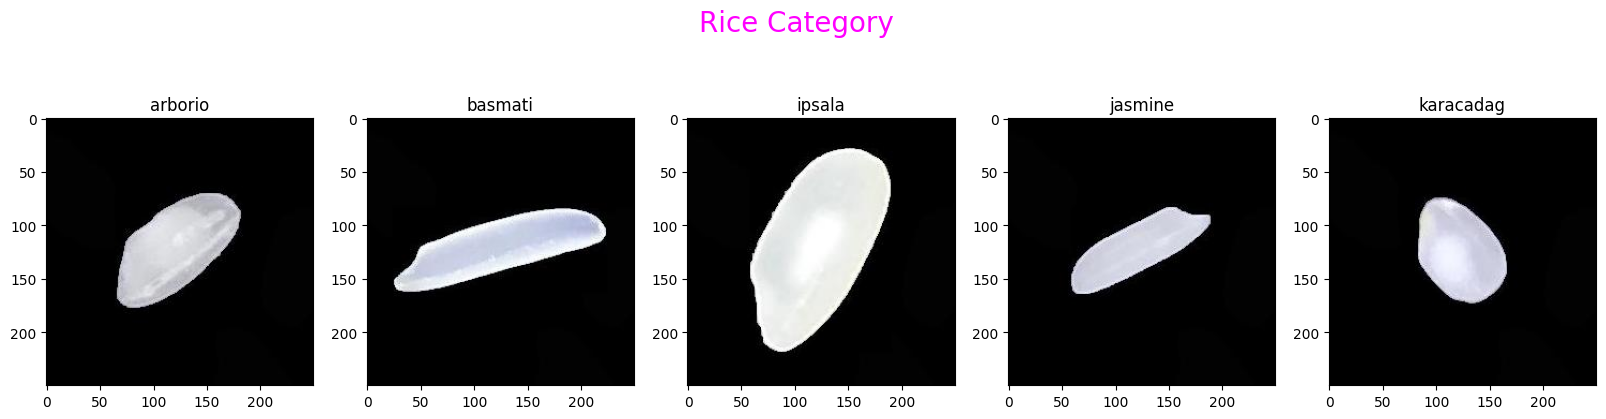

In [20]:
fig , ax = plt.subplots(ncols=5, figsize=(20,5))

fig.suptitle ('Rice Category',color='magenta',fontsize=20)

arborio_img = mpimg.imread(arborio[0])

basmati_img = mpimg.imread(basmati[0])

ipsala_img = mpimg.imread(ipsala[0])

jasmine_img = mpimg.imread(jasmine[0])

karacadag_img = mpimg.imread(karacadag[0])

for index,name in enumerate(list(data.keys())):

    ax[index].set_title(name)

ax[0].imshow(arborio_img)

ax[1].imshow(basmati_img)

ax[2].imshow(ipsala_img)

ax[3].imshow(jasmine_img)

ax[4].imshow(karacadag_img)

In [21]:
rice_types = data.keys()
rice_data = []
label = []
for rice_type in rice_types:
  for file in data[rice_type]:
    rice_array = np.asarray(cv2.imread(file))
    label.append(rice_labels[rice_type])
    rice_data.append(rice_array)
rice_data = np.asarray(rice_data)
label = np.asarray(label)

In [22]:
rice_data = rice_data.reshape(-1, 250, 250, 3)
rice_data.shape

(7500, 250, 250, 3)

In [23]:
label.shape

(7500,)

In [24]:
X = rice_data
Y = label

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
#
import tensorflow as tf
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Dense # type of layer
from tensorflow.keras.activations import linear, relu, sigmoid,softmax #activation function
from tensorflow.keras import regularizers
#
from sklearn.metrics import accuracy_score,classification_report

In [27]:
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(250, 250, 3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(64,activation='relu'))
cnn.add(keras.layers.Dropout(rate= 0.2, seed= 100))
cnn.add(keras.layers.Dense(128,activation='relu'))
cnn.add(keras.layers.Dropout(rate= 0.2, seed= 100))
cnn.add(keras.layers.Dense(units=5,activation='softmax'))

In [28]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 492032)            0         
                                                                 
 dense (Dense)               (None, 64)                31490112  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                        

In [30]:
cnn.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam()
    )

In [33]:
hist=cnn.fit(
    X_train, Y_train,
    epochs=5,
    batch_size=10
)

Epoch 1/5
600/600 [==============================] - 473s 788ms/step - loss: 1.0217
Epoch 2/5
600/600 [==============================] - 478s 797ms/step - loss: 0.9148
Epoch 3/5
600/600 [==============================] - 469s 782ms/step - loss: 0.6545
Epoch 4/5
600/600 [==============================] - 470s 783ms/step - loss: 0.5740
Epoch 5/5
600/600 [==============================] - 483s 804ms/step - loss: 0.4661


In [34]:
cnn.save('Rice.h5')

In [39]:
Y_pred = cnn.predict(X_train)
Y_pred_labels_train = np.argmax(Y_pred, axis=1)
report = classification_report(Y_train, Y_pred_labels_train)
print("Classification Report:")
print(report)

188/188 [==============================] - 94s 498ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1206
           1       0.93      0.99      0.96      1173
           2       0.98      1.00      0.99      1210
           3       0.99      0.76      0.86      1209
           4       0.99      0.98      0.99      1202

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000



In [40]:
Y_pred = cnn.predict(X_test)
Y_pred_labels_test = np.argmax(Y_pred, axis=1)
report = classification_report(Y_test, Y_pred_labels_test)
print("Classification Report:")
print(report)

47/47 [==============================] - 28s 587ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       294
           1       0.89      0.98      0.93       327
           2       0.96      0.99      0.98       290
           3       0.95      0.71      0.81       291
           4       0.96      0.93      0.95       298

    accuracy                           0.91      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.91      0.91      1500

